In [1]:
import pandas as pd 
import numpy as np

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import xgboost as xgb
import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sb

/home/yuan/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/yuan/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df = pd.read_csv('../Microsoft-Malware-Challenge/Dataset/train/LargeTrain.csv')

In [3]:
#extract all columns name
col_name = list(df.columns.values)[:1804]

#Generate feature and target array
feature = df[col_name].values
target = df['Class'].values

In [4]:
gbm0 = GradientBoostingClassifier(random_state=10)

In [5]:
%%time
gg = gbm0.fit(feature, target)

CPU times: user 6min 11s, sys: 36 ms, total: 6min 11s
Wall time: 6min 11s


In [6]:
feature_rank = sorted(zip(map(lambda x: round(x, 5), gg.feature_importances_), col_name), reverse=True)
feature_rank[:10]

[(0.0686, 'section_names_header'),
 (0.04914, 'ent_q_diff_diffs_1_median'),
 (0.02167, 'ent_q_diffs_max'),
 (0.01968, 'Offset.1'),
 (0.01823, 'DATA'),
 (0.01625, 'TB_c7'),
 (0.01133, 'ent_q_diffs_19'),
 (0.01098, 'string_len_counts_2'),
 (0.01049, 'ent_p_diffs_18'),
 (0.01043, 'section_names_.edata')]

In [7]:
%%time
param_test1 = {
 'n_estimators':range(20,41,10),
 'max_depth':range(5,10,2)
}
gb_search1 = GridSearchCV(estimator = GradientBoostingClassifier(random_state=10), 
     param_grid = param_test1)
gb_search1.fit(feature, target)
print gb_search1.grid_scores_, gb_search1.best_params_, gb_search1.best_score_

[mean: 0.99236, std: 0.00068, params: {'n_estimators': 20, 'max_depth': 5}, mean: 0.99310, std: 0.00081, params: {'n_estimators': 30, 'max_depth': 5}, mean: 0.99319, std: 0.00068, params: {'n_estimators': 40, 'max_depth': 5}, mean: 0.99190, std: 0.00166, params: {'n_estimators': 20, 'max_depth': 7}, mean: 0.99245, std: 0.00150, params: {'n_estimators': 30, 'max_depth': 7}, mean: 0.99282, std: 0.00137, params: {'n_estimators': 40, 'max_depth': 7}, mean: 0.99015, std: 0.00051, params: {'n_estimators': 20, 'max_depth': 9}, mean: 0.99098, std: 0.00034, params: {'n_estimators': 30, 'max_depth': 9}, mean: 0.99356, std: 0.00079, params: {'n_estimators': 40, 'max_depth': 9}] {'n_estimators': 40, 'max_depth': 9} 0.993559072506
CPU times: user 3h 20min 23s, sys: 1.45 s, total: 3h 20min 25s
Wall time: 3h 20min 26s


In [11]:
print gb_search1.best_params_
print gb_search1.param_grid['max_depth']
print gb_search1.param_grid['n_estimators']
print gb_search1.best_score_

{'n_estimators': 40, 'max_depth': 9}
[5, 7, 9]
[20, 30, 40]
0.993559072506


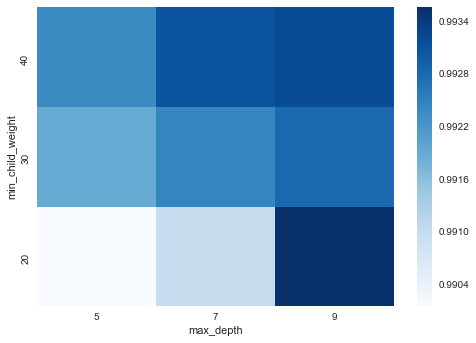

In [13]:
grid_visualization = []

for grid_pair in gb_search1.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (3, 3)
sb.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, gb_search1.param_grid['max_depth'])
plt.yticks(np.arange(3) + 0.5, gb_search1.param_grid['n_estimators'])
plt.xlabel('max_depth')
plt.ylabel('min_child_weight')